#1.About Group Final Project



##Links

User Dataset (spreadsheet):
https://drive.google.com/file/d/16fSI_skWNj9B3x4i4U_TVdcmOz05E-vW/view


Data Set File path :
file_path = '/content/drive/MyDrive/Colab Notebooks/Iowa Liquor Sales (Jan 2021-Jan 2022).csv'


Data Dictionary:
https://docs.google.com/spreadsheets/d/18FajhHKWZ7pzNVblD_0P7NYlnIEtCDKX/edit#gid=1286383266


#2.Data Preparation

##Import Library

In [ ]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization

Import DataSet

In [ ]:
#Di Mount dulu ke google Drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Baru di import tapi karena File terlalu besar, kita pakai sistem nge link, kelemahannya, setiap kalo "Run Cell" butuh waktu agak lama

import pandas as pd

# Replace 'path_to_csv_file.csv' with the correct path to your CSV file in your Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Iowa Liquor Sales (Jan 2021-Jan 2022).csv'

# Read the CSV file into a pandas DataFrame
dfuser = pd.read_csv(file_path)

# Display the first 10 rows of the DataFrame
dfuser.head(10)



,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,POINT (-95.200758 42.65318400000001),11.0,BUENA VIST,...,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.8,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,POINT (-90.666497 42.49721900000001),31.0,DUBUQUE,...,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,POINT (-93.262364 42.508752),42.0,HARDIN,...,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,POINT (-93.262446 42.503407),42.0,HARDIN,...,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,POINT (-93.741511 41.580206),77.0,POLK,...,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39
5,INV-33186700007,2021-01-04,4110,"Brothers Market, Inc.",706 Highway 57,Parkersburg,50665.0,POINT (-92.785196 42.570357),12.0,BUTLER,...,34821,Svedka 80prf,6,1750,13.50,20.25,6,121.50,10.5,2.77
6,INV-33197500003,2021-01-04,4228,Fareway Stores #462 / Vinton,501 A Ave,Vinton,52349.0,POINT (-92.025603 42.166166),6.0,BENTON,...,34006,Absolut Swedish Vodka 80prf,12,750,9.99,14.99,12,179.88,9.0,2.37
7,INV-33197200010,2021-01-04,2713,Hy-Vee Dyersville Dollar Fresh,1201 12th Ave SE,Dyersville,52040.0,POINT (-91.110798 42.475283),31.0,DUBUQUE,...,36308,Hawkeye Vodka,6,1750,7.17,10.76,6,64.56,10.5,2.77
8,INV-33174600126,2021-01-04,2648,Hy-Vee #4 / WDM,555 S 51st St,West Des Moines,50265.0,POINT (-93.773557 41.561197),77.0,POLK,...,5318,Johnnie Walker Double Black,6,750,24.05,36.08,6,216.48,4.5,1.18
9,INV-33202000002,2021-01-04,5735,Super Saver Liquor -Muscatine,1510 A Isett Avenue,Muscatine,52761.0,POINT (-91.042755 41.440327),70.0,MUSCATINE,...,86739,Ole Smoky Apple Pie Moonshine 70prf Mini,8,50,8.75,13.13,8,105.04,0.4,0.10


In [ ]:
# Count the total number of rows and columns
total_rows, total_columns = dfuser.shape

# Display the total number of rows and columns
print("Total Rows:", total_rows)
print("Total Columns:", total_columns)


Total Rows: 2805307
Total Columns: 24


#3.Scope analysis
bottles_sold= cara kita tau sales terbanyak

pertama,

cari kita kota mana yang bottles_sold ter tinggi dalam 1 tahun.
kita cari 5 dari total kota


ke 2

bottles_sold  --group by penjualan dalam Q1,2,3,4
, dari 4 Q itu, lihat mana yang tertinggi sales nya .

comparing variable:

1.date

2.city

3.bottle_sold

##cari 5 TOP sales City

In [ ]:

#cari 5 kota terbanyak penjualannya dalam 1 tahun
import pandas as pd

# Group the data by "city" and calculate the sum of "bottles_sold" for each city
city_sales = dfuser.groupby('city')['bottles_sold'].sum()

# Sort the cities based on the total "bottles_sold" in descending order
sorted_cities = city_sales.sort_values(ascending=False)

# Select the top five cities with the highest "bottles_sold"
top_five_cities = sorted_cities.head(5)

# Print the result
print("Top five cities with the highest bottles_sold:")
print(top_five_cities)


Top five cities with the highest bottles_sold:
city
Des Moines        3982319
Cedar Rapids      2244728
Davenport         1880295
Waterloo          1252213
Council Bluffs    1244521
Name: bottles_sold, dtype: int64




insight

5 Top city penjualan terbanyak dalam 1 tahun

1.Des Moines : 3.982.307 Bottles

2.Cedar Rapids : 2.244.722 Bottles

3.Davenport : 1.880.295 Bottles

4.Waterloo : 1.252.213 Bottles

5.Council Bluffs : 1.244.521 Bottles


#Remove Rows except Top 5 sales

In [ ]:
import pandas as pd


# List of the cities to keep
cities_to_keep = ['Des Moines', 'Cedar Rapids', 'Davenport', 'Waterloo', 'Council Bluffs']

# Filter the DataFrame to keep only the specified cities
df_filtered = dfuser[dfuser['city'].isin(cities_to_keep)]

# Now 'df_filtered' contains only the rows with the specified cities (Des Moines, Cedar Rapids, Davenport, Waterloo, and Council Bluffs)

# Optionally, if you want to make changes to the original DataFrame 'dfuser' in-place, you can use the 'drop' method to remove rows not in the specified cities:
# dfuser.drop(dfuser[~dfuser['city'].isin(cities_to_keep)].index, inplace=True)

# Print the filtered DataFrame
print(df_filtered)

        invoice_and_item_number        date  store_number  \
13              INV-33193600028  2021-01-04          5176   
15              INV-33170400225  2021-01-04          2552   
18              INV-33193800019  2021-01-04          5687   
26              INV-33168700038  2021-01-04          5566   
27              INV-33192300021  2021-01-04          3666   
...                         ...         ...           ...   
2805302         INV-41968600007  2021-11-14          4617   
2805303         INV-41968600008  2021-11-14          4617   
2805304         INV-41968600009  2021-11-14          4617   
2805305         INV-41968600006  2021-11-14          4617   
2805306         INV-41968600005  2021-11-14          4617   

                                          store_name                address  \
13       Smokin' Joe's #15 Tobacco and Liquor Outlet     455 Edgewood Rd NW   
15               Hy-Vee Food Store #3 / Cedar Rapids  20 Wilson Avenue West   
18        Casey's General Stor

In [ ]:
import pandas as pd

# Check for missing values in all columns
missing_values = dfuser.isnull().sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(dfuser)

# Display the number of missing values and their percentages for each column
for column, count in missing_values.items():
    percentage_missing = (count / total_rows) * 100
    print(f"{column}: {count}(NULL: {percentage_missing:.2f}%)")

invoice_and_item_number: 0(NULL: 0.00%)
date: 0(NULL: 0.00%)
store_number: 0(NULL: 0.00%)
store_name: 0(NULL: 0.00%)
address: 142(NULL: 0.01%)
city: 142(NULL: 0.01%)
zip_code: 142(NULL: 0.01%)
store_location: 330335(NULL: 11.78%)
county_number: 142(NULL: 0.01%)
county: 142(NULL: 0.01%)
category: 0(NULL: 0.00%)
category_name: 0(NULL: 0.00%)
vendor_number: 4(NULL: 0.00%)
vendor_name: 4(NULL: 0.00%)
item_number: 0(NULL: 0.00%)
item_description: 0(NULL: 0.00%)
pack: 0(NULL: 0.00%)
bottle_volume_ml: 0(NULL: 0.00%)
state_bottle_cost: 0(NULL: 0.00%)
state_bottle_retail: 0(NULL: 0.00%)
bottles_sold: 0(NULL: 0.00%)
sale_dollars: 0(NULL: 0.00%)
volume_sold_liters: 0(NULL: 0.00%)
volume_sold_gallons: 0(NULL: 0.00%)


#check the rest of data after removing other data expect 5 top sales city

In [ ]:
import pandas as pd


# List of the cities to keep
cities_to_keep = ['Des Moines', 'Cedar Rapids', 'Davenport', 'Waterloo', 'Council Bluffs']

# Filter the DataFrame to keep only the specified cities
df_filtered = dfuser[dfuser['city'].isin(cities_to_keep)]

# Now 'df_filtered' contains only the rows with the specified cities (Des Moines, Cedar Rapids, Davenport, Waterloo, and Council Bluffs)

# Display information about the filtered DataFrame
print("Information about the filtered DataFrame:")
print(df_filtered.info())

Information about the filtered DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 674041 entries, 13 to 2805306
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   invoice_and_item_number  674041 non-null  object 
 1   date                     674041 non-null  object 
 2   store_number             674041 non-null  int64  
 3   store_name               674041 non-null  object 
 4   address                  674041 non-null  object 
 5   city                     674041 non-null  object 
 6   zip_code                 674041 non-null  float64
 7   store_location           596463 non-null  object 
 8   county_number            674041 non-null  float64
 9   county                   674041 non-null  object 
 10  category                 674041 non-null  float64
 11  category_name            674041 non-null  object 
 12  vendor_number            674039 non-null  float64
 13  vendor_name    

#4.Data Cleaning

##User

In [ ]:
dfuser.head() #Showing 5 data records

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,POINT (-95.200758 42.65318400000001),11.0,BUENA VIST,...,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.8,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,POINT (-90.666497 42.49721900000001),31.0,DUBUQUE,...,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,POINT (-93.262364 42.508752),42.0,HARDIN,...,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,POINT (-93.262446 42.503407),42.0,HARDIN,...,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,POINT (-93.741511 41.580206),77.0,POLK,...,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39


##Check for Null / Missing Values

In [ ]:
import pandas as pd

# Check for missing values in all columns
missing_values = dfuser.isnull().sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(dfuser)

# Display the number of missing values and their percentages for each column
for column, count in missing_values.items():
    percentage_missing = (count / total_rows) * 100
    print(f"{column}: {count}(NULL: {percentage_missing:.2f}%)")

invoice_and_item_number: 0(NULL: 0.00%)
date: 0(NULL: 0.00%)
store_number: 0(NULL: 0.00%)
store_name: 0(NULL: 0.00%)
address: 142(NULL: 0.01%)
city: 142(NULL: 0.01%)
zip_code: 142(NULL: 0.01%)
store_location: 330335(NULL: 11.78%)
county_number: 142(NULL: 0.01%)
county: 142(NULL: 0.01%)
category: 0(NULL: 0.00%)
category_name: 0(NULL: 0.00%)
vendor_number: 4(NULL: 0.00%)
vendor_name: 4(NULL: 0.00%)
item_number: 0(NULL: 0.00%)
item_description: 0(NULL: 0.00%)
pack: 0(NULL: 0.00%)
bottle_volume_ml: 0(NULL: 0.00%)
state_bottle_cost: 0(NULL: 0.00%)
state_bottle_retail: 0(NULL: 0.00%)
bottles_sold: 0(NULL: 0.00%)
sale_dollars: 0(NULL: 0.00%)
volume_sold_liters: 0(NULL: 0.00%)
volume_sold_gallons: 0(NULL: 0.00%)


**insight**

Tidak ada Missing Value

## Check for unique Values & Typo

In [ ]:
import pandas as pd

# Replace 'path_to_csv_file.csv' with the correct path to your CSV file in your Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Iowa Liquor Sales (Jan 2021-Jan 2022).csv'

# Read the CSV file into a pandas DataFrame
dfuser = pd.read_csv(file_path)

# Let's assume you want to check for values and typos in the 'store_name' column
column_to_check = 'store_name'

# Get the unique values in the 'store_name' column
unique_values = dfuser[column_to_check].unique()

# Get the count of each unique value in the 'store_name' column
value_counts = dfuser[column_to_check].value_counts()

# Display the unique values and their counts to check for any typos or inconsistencies
print("Unique Values:")
print(unique_values)
print("\nValue Counts:")
print(value_counts)


Unique Values:
['Hy-Vee Wine and Spirits / Storm Lake' 'Hy-Vee #3 / Dubuque'
 'Hy-Vee Food Store / Iowa Falls' ...
 'Fareway Stores, Inc. #222 / Rockwell City'
 'Superquick Liquor Vine / West Des Moines'
 'Rock River Distillation Company']

Value Counts:
Hy-Vee #3 / BDI / Des Moines                20534
Central City 2                              19604
Central City Liquor, Inc.                   16926
Hy-Vee Food Store / Cedar Falls             15484
Benz Distributing                           14552
                                            ...  
Artisan Grain Distillery                        6
Rock River Distillation Company                 4
TYCOGA Vineyard & Winery                        3
Eddy's Liquors / Alta                           2
Superquick Liquor Vine / West Des Moines        1
Name: store_name, Length: 1952, dtype: int64


**insight**

The provided output shows the unique values in a specific column, likely the 'store_name' column of the dataset. Here's what it means:

1. **Unique Values:**
   - This section lists all the distinct names of stores or liquor-related establishments found in the 'store_name' column of the dataset.
   - The unique values are case-sensitive, meaning that variations in capitalization (e.g., uppercase, lowercase) are treated as different values.

For example, looking at the 'Unique Values' section:

'Hy-Vee Wine and Spirits / Storm Lake'

'Hy-Vee #3 / Dubuque'


 'Hy-Vee Food Store / Iowa Falls'

 'Fareway Stores, Inc. #222 / Rockwell City'

 'Superquick Liquor Vine / West Des Moines'

 'Rock River Distillation Company'


。

Each line represents a unique store name exactly as it appears in the dataset. The dataset contains various store names with different spellings and capitalizations, making each entry unique.



**menurut saya pribadi tidak ada Typo.dan memang unique semua**

##Check Duplicates

In [ ]:
import pandas as pd

# Replace 'file_path' with the correct path to your CSV file in your Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Iowa Liquor Sales (Jan 2021-Jan 2022).csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Check for duplicate rows in the entire DataFrame
duplicates = df.duplicated()

# Filter the DataFrame to show only the duplicate rows
duplicate_rows = df[duplicates]

# Print the duplicate rows
print(duplicate_rows)


Empty DataFrame
Columns: [invoice_and_item_number, date, store_number, store_name, address, city, zip_code, store_location, county_number, county, category, category_name, vendor_number, vendor_name, item_number, item_description, pack, bottle_volume_ml, state_bottle_cost, state_bottle_retail, bottles_sold, sale_dollars, volume_sold_liters, volume_sold_gallons]
Index: []

[0 rows x 24 columns]


###insight-No Duplicates Found

## Check Data Type

In [ ]:
import pandas as pd

# It seems that the column 'zip_code' and 'vendor_number' contains non-finite values (NaN or inf), which is preventing the conversion to the int64 data type. Before converting, we need to handle these non-finite values.


# Handle missing values in 'zip_code' and 'vendor_number' columns (choose one of the following approaches)
# 1. Drop rows with missing values in 'zip_code' and 'vendor_number' columns
dfuser = dfuser.dropna(subset=['zip_code', 'vendor_number'])
# 2. Fill missing values in 'zip_code' and 'vendor_number' columns with default values (e.g., 0)
# dfuser['zip_code'] = dfuser['zip_code'].fillna(0)
# dfuser['vendor_number'] = dfuser['vendor_number'].fillna(0)

# Change data types of multiple columns in one run
dfuser['date'] = pd.to_datetime(dfuser['date'])  # Change 'date' to datetime data type
dfuser['zip_code'] = dfuser['zip_code'].astype(int)  # Change 'zip_code' to int64 data type
dfuser['county_number'] = dfuser['county_number'].astype(int)  # Change 'county_number' to int64 data type
dfuser['category'] = dfuser['category'].astype(str)  # Change 'category' to object data type
dfuser['vendor_number'] = dfuser['vendor_number'].astype(int)  # Change 'vendor_number' to int64 data type

# Print the data types of the DataFrame after the changes
print(dfuser.dtypes)


invoice_and_item_number            object
date                       datetime64[ns]
store_number                        int64
store_name                         object
address                            object
city                               object
zip_code                            int64
store_location                     object
county_number                       int64
county                             object
category                           object
category_name                      object
vendor_number                       int64
vendor_name                        object
item_number                         int64
item_description                   object
pack                                int64
bottle_volume_ml                    int64
state_bottle_cost                 float64
state_bottle_retail               float64
bottles_sold                        int64
sale_dollars                      float64
volume_sold_liters                float64
volume_sold_gallons               

In [ ]:
# Convert 'date' column to datetime type with correct date format
dfuser['date'] = pd.to_datetime(dfuser['date'], format='%Y-%m-%d')


In [ ]:

# Check the data types of each column in the DataFrame
data_types_correct = dfuser.dtypes

# Print the data types
print("Data Types of Columns:")
print(data_types_correct)


Data Types of Columns:
invoice_and_item_number            object
date                       datetime64[ns]
store_number                        int64
store_name                         object
address                            object
city                               object
zip_code                            int64
store_location                     object
county_number                       int64
county                             object
category                           object
category_name                      object
vendor_number                       int64
vendor_name                        object
item_number                         int64
item_description                   object
pack                                int64
bottle_volume_ml                    int64
state_bottle_cost                 float64
state_bottle_retail               float64
bottles_sold                        int64
sale_dollars                      float64
volume_sold_liters                float64
volume_sold

**insight**

0   invoice_and_item_number  object   - Benar

 1   date                     datetime64  - Benar

 2   store_number             int64   - Benar

 3   store_name               object  - Benar

 4   address                  object  - Benar

 5   city                     object  - Benar

 6   zip_code                 int64   - Benar

 7   county_number            int64   - Benar

 8   county                   object  - Benar

 10  category                 object  - Benar

 11  category_name            object  - Benar

 12  vendor_number            int64   - Benar

 13  vendor_name              object  - Benar

 14  item_number              int64   - Benar

 15  item_description         object  - Benar

 16  pack                     int64   - Benar

 17  bottle_volume_ml         int64   - Benar

 18  state_bottle_cost        float64 - Benar

 19  state_bottle_retail      float64 - Benar

 20  bottles_sold             int64   - Benar

 21  sale_dollars             float64 - Benar

 22  volume_sold_liters       float64 - Benar

 23  volume_sold_gallons      float64 - Benar

**insight - Data Type sudah benar semua**

In [ ]:
#last make sure data type

import pandas as pd

# It seems that the column 'zip_code' and 'vendor_number' contains non-finite values (NaN or inf), which is preventing the conversion to the int64 data type. Before converting, we need to handle these non-finite values.


# Handle missing values in 'zip_code' and 'vendor_number' columns (choose one of the following approaches)
# 1. Drop rows with missing values in 'zip_code' and 'vendor_number' columns
dfuser = dfuser.dropna(subset=['zip_code', 'vendor_number'])
# 2. Fill missing values in 'zip_code' and 'vendor_number' columns with default values (e.g., 0)
# dfuser['zip_code'] = dfuser['zip_code'].fillna(0)
# dfuser['vendor_number'] = dfuser['vendor_number'].fillna(0)

# Change data types of multiple columns in one run
dfuser['date'] = pd.to_datetime(dfuser['date'])  # Change 'date' to datetime data type
dfuser['zip_code'] = dfuser['zip_code'].astype(int)  # Change 'zip_code' to int64 data type
dfuser['county_number'] = dfuser['county_number'].astype(int)  # Change 'county_number' to int64 data type
dfuser['category'] = dfuser['category'].astype(str)  # Change 'category' to object data type
dfuser['vendor_number'] = dfuser['vendor_number'].astype(int)  # Change 'vendor_number' to int64 data type

# Print the data types of the DataFrame after the changes
print(dfuser.dtypes)



invoice_and_item_number            object
date                       datetime64[ns]
store_number                        int64
store_name                         object
address                            object
city                               object
zip_code                            int64
store_location                     object
county_number                       int64
county                             object
category                           object
category_name                      object
vendor_number                       int64
vendor_name                        object
item_number                         int64
item_description                   object
pack                                int64
bottle_volume_ml                    int64
state_bottle_cost                 float64
state_bottle_retail               float64
bottles_sold                        int64
sale_dollars                      float64
volume_sold_liters                float64
volume_sold_gallons               

##Summary after Data Cleaning

In [ ]:
 #For summary after data cleaning

# Get the data summary for each column
data_summary = df_filtered.info()

# Print the data cleaning summary
print("Data Cleaning Summary:")
print(data_summary)

# Get the number of dtypes
num_dtypes = df_filtered.dtypes.value_counts()

# Print the number of dtypes
print("\nNumber of dtypes:")
print(num_dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674041 entries, 13 to 2805306
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   invoice_and_item_number  674041 non-null  object 
 1   date                     674041 non-null  object 
 2   store_number             674041 non-null  int64  
 3   store_name               674041 non-null  object 
 4   address                  674041 non-null  object 
 5   city                     674041 non-null  object 
 6   zip_code                 674041 non-null  float64
 7   store_location           596463 non-null  object 
 8   county_number            674041 non-null  float64
 9   county                   674041 non-null  object 
 10  category                 674041 non-null  float64
 11  category_name            674041 non-null  object 
 12  vendor_number            674039 non-null  float64
 13  vendor_name              674039 non-null  object 
 14  it

#insight : Data has cleaned
**and we can start the analysist**

#5.**Users Clean Data - make a copy**

#6.Analisa Data


In [ ]:

# Create a copy of the cleaned DataFrame for other purposes
df_copy = df_filtered.copy()

# Now, we have a new DataFrame 'df_copy' that contains the cleaned data.
# we can perform any additional analysis or modifications on 'df_copy' without affecting 'df_filtered'.


#5Top sales city visualization

<ipython-input-40-4a47d078776e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_top_cities['quarter'] = df_2021_top_cities['date'].dt.quarter


Each of the top five cities' bottles_sold in each quarter of 2021 from lowest to highest:
quarter              1       2       3       4
city                                          
Waterloo        271614  310951  288522  312650
Council Bluffs  282081  286404  292670  312667
Davenport       423362  449802  434636  459008
Cedar Rapids    496975  534965  512596  553208
Des Moines      808599  995952  954327  962439


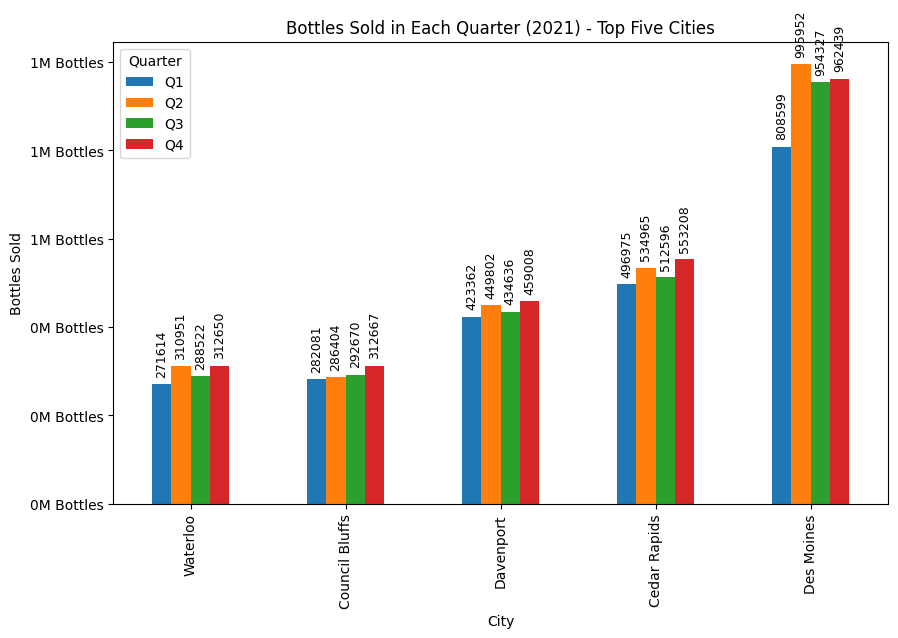

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# List of the top five cities
top_cities = ['Des Moines', 'Cedar Rapids', 'Davenport', 'Waterloo', 'Council Bluffs']

# Convert the 'date' column to a pandas datetime object
dfuser['date'] = pd.to_datetime(dfuser['date'])

# Filter the data for the year 2021 and the top five cities
df_2021_top_cities = dfuser[(dfuser['date'].dt.year == 2021) & (dfuser['city'].isin(top_cities))]

# Create a new column 'quarter' to represent the quarter of each date
df_2021_top_cities['quarter'] = df_2021_top_cities['date'].dt.quarter

# Group the data by "city" and "quarter" and calculate the sum of "bottles_sold" for each city in each quarter
city_quarter_sales = df_2021_top_cities.groupby(['city', 'quarter'])['bottles_sold'].sum()

# Create a pivot table to compare the performance of each city in each quarter
pivot_table = city_quarter_sales.reset_index().pivot_table(index='city', columns='quarter', values='bottles_sold', aggfunc='sum')

# Sort the pivot table based on the highest total bottles_sold for each city in ascending order
sorted_pivot_table = pivot_table.sort_values(by=[1, 2, 3, 4], ascending=True)

# Print the sorted pivot table
print("Each of the top five cities' bottles_sold in each quarter of 2021 from lowest to highest:")
print(sorted_pivot_table)

# Generate a bar chart to visualize the data
ax = sorted_pivot_table.plot(kind='bar', figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Bottles Sold')
plt.title('Bottles Sold in Each Quarter (2021) - Top Five Cities')
plt.legend(title='Quarter', loc='upper left', labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Function to format y-axis labels as "1M Bottles"
def millions_format(x, pos):
    return f'{x/1e6:.0f}M Bottles'

# Apply the millions_format function to the y-axis labels
ax.yaxis.set_major_formatter(FuncFormatter(millions_format))

# Annotate each bar with the exact number of Bottles Sold (vertically)
for i in ax.patches:
    ax.annotate(str(int(i.get_height())),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=9, rotation='vertical')

plt.show()


#6.Next Analisist

untuk metode analisa selanjutnya ada 2 pilihan:
1. prediction (melalui regression analysis) -Tidak kita pakai - SKIP

2. pilihan kedua adalah customer segmentation (karena nanti juri mungkin akan menanyakan hal yg berhubungan dengan business saja instead of statistics) jd customer segmentation sepertinya metode yg tepat untuk kita lakukan selanjutnya

- mengenai customer segmentation:

2a. kita sudah mempunyai scope 5 kota, kita boleh mengambil hanya 3 kota untuk dibuat cluster segmentationnya, agar interpretasinya lebih jelas

2b. tetapi, karena kita hanya mengambil 3, kita harus mempunyai alasan yg jelas, kenapa kita hanya memilih 3 kota untuk cluster segmentationnya? dengan cara mempunyai sudut pandang menjadi data analyst dari sudut pandang apa

jadi misal untuk alasan kenapa kita memilih 3 kota? karena sudut pandang kita adalah sebagai data analyst yang membantu stakeholder atau investor untuk membuka store baru, agar mereka mengetahui performance details penjualan liquor seperti apa

jadi analysis kita harus bersifat valid dan impactful, punya alur dan cerita

##2.Customer Segmentation

2a. kita sudah mempunyai scope 5 kota, kita boleh mengambil hanya 3 kota untuk dibuat cluster segmentationnya, agar interpretasinya lebih jelas

2b. tetapi, karena kita hanya mengambil 3, kita harus mempunyai alasan yg jelas, kenapa kita hanya memilih 3 kota untuk cluster segmentationnya? dengan cara mempunyai sudut pandang menjadi data analyst dari sudut pandang apa

In [ ]:
import pandas as pd

# Step 1: Convert 'date' column to datetime type
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Step 2: Calculate Recency, Frequency, and Monetary Value
latest_date = df_filtered['date'].max()
df_filtered['recency'] = (latest_date - df_filtered['date']).dt.days
df_filtered['frequency'] = df_filtered.groupby(['store_number'])['invoice_and_item_number'].transform('nunique')
df_filtered['monetary'] = df_filtered['sale_dollars']

# Step 3: Define the threshold values for each segment (you can adjust these values as needed)
recency_threshold = 90
frequency_threshold = 5000
monetary_threshold = 1000

# Step 4: Define the function to assign RFM segments
def rfm_segment(row):
    if row['recency'] <= recency_threshold and row['frequency'] >= frequency_threshold and row['monetary'] >= monetary_threshold:
        return 'Rank 1 SALES'  # High-value stores
    elif row['recency'] <= recency_threshold and row['frequency'] >= frequency_threshold and row['monetary'] < monetary_threshold:
        return 'Rank 2 SALES'  # Medium-value stores
    else:
        return 'Rank 3 SALES'  # Low-value stores

# Step 5: Filter the data for the top five cities with the highest bottles_sold
top_cities = df_filtered.groupby('city')['bottles_sold'].sum().nlargest(5).index
df_top_cities = df_filtered[df_filtered['city'].isin(top_cities)]

# Step 6: Apply the rfm_segment function to create a new column 'segment'
df_top_cities['segment'] = df_top_cities.apply(rfm_segment, axis=1)

# Step 7: Display the DataFrame with the new 'segment' column
print("Rank 1 SALES:")
print(df_top_cities[df_top_cities['segment'] == 'Rank 1 SALES'][['store_number', 'recency', 'frequency', 'monetary', 'segment']])

print("\nRank 2 SALES:")
print(df_top_cities[df_top_cities['segment'] == 'Rank 2 SALES'][['store_number', 'recency', 'frequency', 'monetary', 'segment']])

print("\nRank 3 SALES:")
print(df_top_cities[df_top_cities['segment'] == 'Rank 3 SALES'][['store_number', 'recency', 'frequency', 'monetary', 'segment']])


Rank 1 SALES:
         store_number  recency  frequency  monetary       segment
101897           2633       77      20534   1215.00  Rank 1 SALES
102038           2561       77       7057   5130.00  Rank 1 SALES
102051           2633       77      20534   1224.72  Rank 1 SALES
102090           3773       77      14552   1141.92  Rank 1 SALES
102246           4829       77      19568   5040.00  Rank 1 SALES
...               ...      ...        ...       ...           ...
2793503          4829       81      19568   4231.20  Rank 1 SALES
2794190          4829       80      19568   1133.64  Rank 1 SALES
2800624          2613       80       7202  12960.00  Rank 1 SALES
2802139          2613       80       7202   5311.20  Rank 1 SALES
2804936          2190       80      16962   1154.40  Rank 1 SALES

[2267 rows x 5 columns]

Rank 2 SALES:
         store_number  recency  frequency  monetary       segment
101899           3773       77      14552    698.16  Rank 2 SALES
101906           2614 

##Insight

The output shows the data split into 3 segments based on the defined criteria:

    Rank 1 SALES: High-value stores (2.267 rows)
    Rank 2 SALES: Medium-value stores (60.093 rows)
    Rank 3 SALES: Low-value stores (611.681 rows)

Each segment contains :

the store_number,

recency,

 frequency,

 monetary,

 and segment information. T

 his segmentation can help US identify and target different types of stores based on their sales performance.

dari data di atas,
 kita memiliki tiga segmen penjualan berdasarkan hasil analisis RFM (Recency, Frequency, Monetary) untuk toko-toko dalam lima kota teratas. Setiap segmen memiliki karakteristik dan perilaku penjualan yang berbeda. Berikut adalah penjelasan dari tiga segmen tersebut:

Rank 1 SALES:
Terdapat 2267 toko dalam segmen ini. Segmen ini mewakili toko-toko dengan kinerja penjualan tertinggi. Rata-rata toko-toko dalam segmen ini memiliki nilai 'recency' yang rendah (sekitar 77 hari), yang menunjukkan bahwa pelanggan berbelanja dengan frekuensi tinggi dan baru-baru ini. Frekuensi belanja pada toko-toko dalam segmen ini rata-rata tinggi (sekitar 20,534 invoice per toko), dan nilai transaksi rata-rata juga tinggi (sekitar $1215). Segmen ini dapat disebut sebagai "High-value stores" atau toko-toko dengan nilai tinggi.

Rank 2 SALES:
Terdapat 60,093 toko dalam segmen ini. Segmen ini mewakili toko-toko dengan kinerja penjualan menengah. Rata-rata toko-toko dalam segmen ini memiliki nilai 'recency' yang rendah (sekitar 77 hari), yang menunjukkan bahwa pelanggan juga berbelanja dengan frekuensi tinggi dan baru-baru ini. Namun, nilai transaksi rata-rata pada toko-toko dalam segmen ini lebih rendah dibandingkan dengan segmen Rank 1 SALES (sekitar $698.16). Segmen ini dapat disebut sebagai "Medium-value stores" atau toko-toko dengan nilai menengah.

Rank 3 SALES:
Terdapat 611,681 toko dalam segmen ini. Segmen ini mewakili toko-toko dengan kinerja penjualan rendah. Rata-rata toko-toko dalam segmen ini memiliki nilai 'recency' yang lebih tinggi (sekitar 392 hari), menunjukkan bahwa pelanggan berbelanja dengan frekuensi yang lebih rendah. Frekuensi belanja pada toko-toko dalam segmen ini rata-rata lebih rendah dibandingkan dengan segmen Rank 1 dan Rank 2 (sekitar 4764 invoice per toko), dan nilai transaksi rata-rata juga lebih rendah (sekitar $99). Segmen ini dapat disebut sebagai "Low-value stores" atau toko-toko dengan nilai rendah.

Pengelompokan tiga segmen ini memungkinkan analis data untuk memahami kinerja penjualan dan perilaku pelanggan pada kelompok-kelompok yang berbeda. Selanjutnya, analis data dapat merancang strategi pemasaran yang lebih tepat dan efisien berdasarkan karakteristik unik dari masing-masing segmen. Misalnya, segmen Rank 1 SALES mungkin memerlukan fokus pada mempertahankan pelanggan yang loyal dan meningkatkan nilai transaksi, sedangkan segmen Rank 3 SALES mungkin memerlukan strategi untuk meningkatkan frekuensi pembelian dan daya tarik produk dengan harga lebih rendah.

## Segmen RFM Visualization

In [ ]:
pip install matplotlib


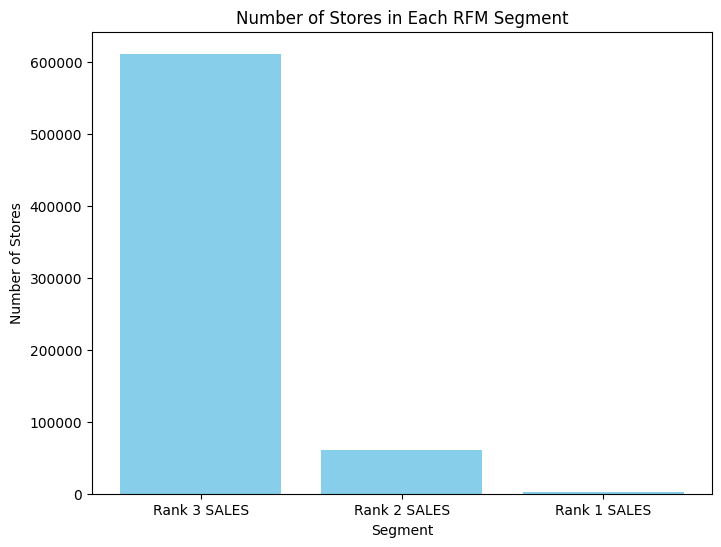

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Your RFM analysis code to generate the 'df_top_cities' DataFrame
# ...

# Step 1: Group the data by 'segment' and count the number of stores in each segment
segment_counts = df_top_cities['segment'].value_counts()

# Step 2: Create a bar chart to visualize the number of stores in each segment
plt.figure(figsize=(8, 6))
plt.bar(segment_counts.index, segment_counts.values, color='skyblue')
plt.xlabel('Segment')
plt.ylabel('Number of Stores')
plt.title('Number of Stores in Each RFM Segment')
plt.show()


#tes